# CV and Transfer Learning

Q1. Import tensorflow (2.x Mandatory)

*   Import other required libraries

In [232]:
%tensorflow_version 2.X

`%tensorflow_version` only switches the major version: `1.x` or `2.x`.
You set: `2.X`. This will be interpreted as: `2.x`.


TensorFlow is already loaded. Please restart the runtime to change versions.


In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [234]:
print(tf.__version__)

2.1.0


Q2. Load CIFAR10 dataset from keras and split into train and test
*    Identify shape of x_train and y_train

In [0]:
from keras.datasets import cifar10 

In [236]:
print(type(cifar10))

<class 'module'>


Q3.

*   Transform x_train and x_test on scale of 0-1
*   Transform y_train and y_test to categories



In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [258]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')
num_classes = 10

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [259]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [260]:
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [0]:
y_test_to_evaluate = y_test

In [0]:
# Convert class vectors to binary class matrices.
import keras
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [242]:
print(y_train.shape)

(50000, 10)


In [243]:
print(y_test.shape)

(10000, 10)


In [244]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [245]:
y_test[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

Q4. Import necessary packages required for Model building
*   Conv2D, Dense, Flatten, Dropout, MaxPooling2D etc.

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D

Q5. Prepare a CNN
 
*   Which will include above layers
*   Freely create your own Architecture and Arguments
*   Print Model Summary

In [0]:
#Clear any previous model from memory
tf.keras.backend.clear_session()

#Initialize model
model = tf.keras.models.Sequential()

#normalize data
model.add(tf.keras.layers.BatchNormalization(input_shape=(32,32,3,)))

#Add 1'st Conv Layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', padding='same'))

#Add 2'nd Conv Layer
model.add(tf.keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu'))

#Add 1'st Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Add 3'rd Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu', padding='same'))

#Add 4'th Conv Layer
model.add(tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))

#Add 2'nd Max Pool layer
model.add(tf.keras.layers.MaxPool2D(pool_size=(2,2)))

#Add 2'nd dropout layer
model.add(tf.keras.layers.Dropout(0.25))

#Add Dense Layers after flattening the data
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))

#Add 2'nd dropout layer
model.add(tf.keras.layers.Dropout(0.5))

#Add Output Layer
model.add(tf.keras.layers.Dense(num_classes, activation='softmax'))

Q6. Train the CNN

*   Compile the model
*   Fit the model (10 epochs, 32 batch size)
*   Evaluate Model Performance

In [0]:
# initiate Adam optimizer
#opt = keras.optimizers.RMSprop(learning_rate=0.0001, decay=1e-6)

opt = tf.keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

# Let's train the model using Adam
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [0]:
#Specify Loass and Optimizer
#model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [250]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 32, 32, 3)         12        
_________________________________________________________________
conv2d (Conv2D)              (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 15, 15, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 64)        3

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [0]:
chkpt = tf.keras.callbacks.ModelCheckpoint('./cifar.h5', monitor='val_acc', save_best_only=True)

In [253]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=5,
          validation_data=(x_test, y_test),
          workers=4,
          callbacks=[chkpt])

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 11s 224us/sample - loss: 1.4591 - accuracy: 0.4728 - val_loss: 1.1199 - val_accuracy: 0.5972
Epoch 2/5
50000/50000 [==============================] - 10s 208us/sample - loss: 1.0555 - accuracy: 0.6257 - val_loss: 0.9205 - val_accuracy: 0.6765
Epoch 3/5
50000/50000 [==============================] - 10s 203us/sample - loss: 0.9036 - accuracy: 0.6833 - val_loss: 0.8864 - val_accuracy: 0.6947
Epoch 4/5
50000/50000 [==============================] - 11s 212us/sample - loss: 0.8153 - accuracy: 0.7168 - val_loss: 0.7268 - val_accuracy: 0.7443
Epoch 5/5
50000/50000 [==============================] - 10s 208us/sample - loss: 0.7577 - accuracy: 0.7367 - val_loss: 0.7229 - val_accuracy: 0.7507


In [254]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=50,
          validation_data=(x_test, y_test),
          workers=4,
          callbacks=[chkpt])

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 209us/sample - loss: 0.7096 - accuracy: 0.7525 - val_loss: 0.7267 - val_accuracy: 0.7504
Epoch 2/50
50000/50000 [==============================] - 10s 209us/sample - loss: 0.6736 - accuracy: 0.7628 - val_loss: 0.6905 - val_accuracy: 0.7601
Epoch 3/50
50000/50000 [==============================] - 10s 210us/sample - loss: 0.6461 - accuracy: 0.7761 - val_loss: 0.6681 - val_accuracy: 0.7680
Epoch 4/50
50000/50000 [==============================] - 10s 207us/sample - loss: 0.6181 - accuracy: 0.7825 - val_loss: 0.6436 - val_accuracy: 0.7791
Epoch 5/50
50000/50000 [==============================] - 11s 214us/sample - loss: 0.5942 - accuracy: 0.7923 - val_loss: 0.6426 - val_accuracy: 0.7819
Epoch 6/50
50000/50000 [==============================] - 11s 212us/sample - loss: 0.5680 - accuracy: 0.8000 - val_loss: 0.6517 - val_accuracy: 0.7840
Epoch 7/50
50000/50000 [====================

In [0]:
# Predicting on test data 
y_pred_class = model.predict_classes(x_test)

In [262]:
# calculate accuracy of class predictions
from sklearn import metrics
# Score CNN model
metrics.accuracy_score(y_test_to_evaluate, y_pred_class)

0.8092

In [263]:
# Classification report  CNN model
print(metrics.classification_report(y_test_to_evaluate, y_pred_class))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1000
           1       0.92      0.90      0.91      1000
           2       0.78      0.66      0.72      1000
           3       0.65      0.63      0.64      1000
           4       0.73      0.83      0.77      1000
           5       0.73      0.74      0.73      1000
           6       0.80      0.90      0.85      1000
           7       0.89      0.83      0.86      1000
           8       0.89      0.89      0.89      1000
           9       0.90      0.89      0.89      1000

    accuracy                           0.81     10000
   macro avg       0.81      0.81      0.81     10000
weighted avg       0.81      0.81      0.81     10000



Q7. Import packages required for VGG16

*   `tf.keras.application`
> VGG16, preprocess_input, decode_predictions
*   `tf.keras.preprocessing`
> load_img, img_to_array



In [0]:
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions
from tensorflow.keras.preprocessing.image import load_img,img_to_array

In [51]:
#VGG16(include_top=True, weights='imagenet', input_tensor=None, input_shape=None, pooling=None, classes=1000)

In [0]:
#tf.keras.applications.vgg16.preprocess_input()

Q8. Load image


*   Mount Google Drive
*   Navigate to image location (use `os`)
*   Load image and assign a variable (use `load_img`)

In [53]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os

In [55]:
os.getcwd()

'/content'

'/content/drive/My Drive/Colab Notebooks/my_work/Internal Lab/images/images'

In [0]:
os.chdir('/content/drive/My Drive/Colab Notebooks/my_work/Internal Lab/images')

In [0]:
img = load_img(r'/content/drive/My Drive/Colab Notebooks/my_work/Internal Lab/images/images/49436743043_2441587ab9_c.jpg', target_size=[224, 224])

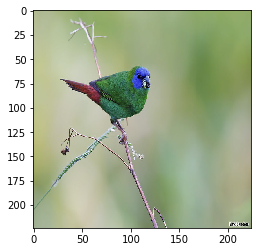

In [71]:
plt.imshow(img)

Q9. Preprocess the image


*   Convert image into array (use `img_to_array`)
*   Check shape of image
*   Reshape image into 4 dimensional format (use `reshape`)
*   Prepare the image for VGG16 (Use `preprocess_input()`)

In [0]:
img_arry = img_to_array(img)

In [76]:
img_arry.shape

(224, 224, 3)

In [0]:
img_arry = img_arry.reshape((1, img_arry.shape[0], img_arry.shape[1], img_arry.shape[2]))

In [0]:
img_arry = preprocess_input(img_arry)

In [79]:
img_arry.shape

(1, 224, 224, 3)

### **Following the above steps for all images to predict**

---



In [0]:
images = []
org = []
for img1 in os.listdir(r'/content/drive/My Drive/Colab Notebooks/my_work/Internal Lab/images/images'):
    org.append(img1)
    img2 = load_img(r'/content/drive/My Drive/Colab Notebooks/my_work/Internal Lab/images/images' +'/'+ img1, target_size=(224, 224))
    img2 = img_to_array(img2)
    img2 = img2.reshape((1, img2.shape[0], img2.shape[1], img2.shape[2]))
    img2 = preprocess_input(img2)
    images.append(img2)
images = np.vstack(images)

In [228]:
images

array([[[[  41.060997 ,   71.221    ,   55.32     ],
         [  40.060997 ,   70.221    ,   54.32     ],
         [  41.060997 ,   69.221    ,   54.32     ],
         ...,
         [  -2.939003 ,   54.221    ,   24.32     ],
         [  -0.939003 ,   54.221    ,   24.32     ],
         [  -3.939003 ,   54.221    ,   21.32     ]],

        [[  41.060997 ,   71.221    ,   55.32     ],
         [  41.060997 ,   71.221    ,   55.32     ],
         [  41.060997 ,   69.221    ,   54.32     ],
         ...,
         [  -0.939003 ,   54.221    ,   24.32     ],
         [   1.060997 ,   53.221    ,   24.32     ],
         [  -1.939003 ,   53.221    ,   21.32     ]],

        [[  42.060997 ,   72.221    ,   56.32     ],
         [  41.060997 ,   71.221    ,   55.32     ],
         [  41.060997 ,   69.221    ,   54.32     ],
         ...,
         [  -1.939003 ,   53.221    ,   21.32     ],
         [   1.060997 ,   53.221    ,   21.32     ],
         [  -0.939003 ,   53.221    ,   19.32     ]],

Q10. Predict the Class of image


*   Use `predict()` to calculate probabilities (Assign a variable)
*   Convert the probabilities to class labels (Use `decode_predictions`)(Assign a variable)
*   Print the classification results


> Use 
>*  label = label[0][0]
>*   print('%s (%.2f%%)' % (label[1], label[2]*100))
>*(where label is variable assigned for `decode_predictions` )



In [0]:
model = VGG16()

In [0]:
pred = model.predict(images)

In [0]:
label = decode_predictions(pred)

In [123]:
label

[[('n01833805', 'hummingbird', 0.36529157),
  ('n01828970', 'bee_eater', 0.3073222),
  ('n01537544', 'indigo_bunting', 0.11989419),
  ('n01820546', 'lorikeet', 0.029818818),
  ('n02268853', 'damselfly', 0.02928949)],
 [('n03393912', 'freight_car', 0.34337294),
  ('n04467665', 'trailer_truck', 0.23375994),
  ('n03895866', 'passenger_car', 0.0965934),
  ('n03272562', 'electric_locomotive', 0.071735926),
  ('n03160309', 'dam', 0.07000049)],
 [('n02279972', 'monarch', 0.99720985),
  ('n02281406', 'sulphur_butterfly', 0.0020955484),
  ('n02264363', 'lacewing', 0.00041590846),
  ('n02281787', 'lycaenid', 0.00016161137),
  ('n02277742', 'ringlet', 0.000110174915)],
 [('n03063599', 'coffee_mug', 0.7589648),
  ('n07930864', 'cup', 0.076536),
  ('n03063689', 'coffeepot', 0.07420068),
  ('n04398044', 'teapot', 0.029663114),
  ('n03950228', 'pitcher', 0.023501217)]]

#NLP

## Question 1

Read file 'tweets.csv'

In [0]:
tweets = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/my_work/Internal Lab/tweets.csv',encoding = 'mac_roman')

**Drop null values**

*   Drop all the rows with null values




In [174]:
tweets.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [175]:
tweets.shape

(9093, 3)

In [176]:
tweets[tweets.isna()].shape

(9093, 3)

In [0]:
df = tweets.dropna()

In [178]:
df.isna().sum().sum()

0

In [179]:
df.shape

(3291, 3)

**Print the dataframe**
*   print initial 5 rows of the data


In [180]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


##Question 2

**Preprocess data**


*   convert all text to lowercase - use .lower()
*   select only numbers, alphabets, and #+_ from text - use re.sub()
*   strip all the text - use .strip() [To remove extra spaces]

In [0]:
import re

In [182]:
df['tweet_text'] = df['tweet_text'].apply(lambda s: re.sub('[^0-9a-z #+_]','',s))
df['tweet_text'] = df['tweet_text'].apply(lambda s: s.lower())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [183]:
df['tweet_text'] = df['tweet_text'].apply(lambda s: s.strip())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [184]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 have a 3 ihone fter 3 hrs tweeting a...,iPhone,Negative emotion
1,jessedee now about fludapp wesome iadihone ap...,iPad or iPhone App,Positive emotion
2,swonderlin an not wait for #iad 2 also hey sho...,iPad,Positive emotion
3,sxsw hope this years festival isnt as crashy ...,iPad or iPhone App,Negative emotion
4,sxtxstate great stuff on ri # arissa ayer oogl...,Google,Positive emotion


## Question 3

In [0]:
df = df[(df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Negative emotion') | (df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion')]

In [186]:
df.is_there_an_emotion_directed_at_a_brand_or_product.value_counts()

Positive emotion    2672
Negative emotion     519
Name: is_there_an_emotion_directed_at_a_brand_or_product, dtype: int64

In [187]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 have a 3 ihone fter 3 hrs tweeting a...,iPhone,Negative emotion
1,jessedee now about fludapp wesome iadihone ap...,iPad or iPhone App,Positive emotion
2,swonderlin an not wait for #iad 2 also hey sho...,iPad,Positive emotion
3,sxsw hope this years festival isnt as crashy ...,iPad or iPhone App,Negative emotion
4,sxtxstate great stuff on ri # arissa ayer oogl...,Google,Positive emotion


**Preprocess data**


*   in column "is_there_an_emotion_directed_at_a_brand_or_product"
select only those rows where value equal to "positive emotion" or "negative emotion"
*   find the value counts of "positive emotion" and "negative emotion"





##Question 4

### Encode labels
- in column "is_there_an_emotion_directed_at_a_brand_or_product"
    - change "positive emotion" to 1
    - change "negative emotion" to 0
- use map function to replace values

In [0]:
#df['is_there_an_emotion_directed_at_a_brand_or_product'] = np.where(df['is_there_an_emotion_directed_at_a_brand_or_product'] == 'Positive emotion',0,1)

In [0]:
df['is_there_an_emotion_directed_at_a_brand_or_product']= df.is_there_an_emotion_directed_at_a_brand_or_product.map({'Negative emotion': 0, 'Positive emotion':1})

In [191]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,wesley83 have a 3 ihone fter 3 hrs tweeting a...,iPhone,0
1,jessedee now about fludapp wesome iadihone ap...,iPad or iPhone App,1
2,swonderlin an not wait for #iad 2 also hey sho...,iPad,1
3,sxsw hope this years festival isnt as crashy ...,iPad or iPhone App,0
4,sxtxstate great stuff on ri # arissa ayer oogl...,Google,1


## Question 5

### Get feature and label
- get column "tweet_text" as feature
- get column "is_there_an_emotion_directed_at_a_brand_or_product" as label

In [0]:
X = df['tweet_text']
y = df['is_there_an_emotion_directed_at_a_brand_or_product']

### Create train and test data
- use train_test_split to get train and test set
- set a random_state
- test_size: 0.25

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.25, random_state=2)

## Question 6

### Vectorize data
- create document-term matrix
- use CountVectorizer()
    - ngram_range: (1, 2)
    - stop_words: 'english'
    - min_df: 2   
- do fit_transform on X_train
- do transform on X_test

In [0]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [0]:
# use CountVectorizer to create document-term matrices from X_train and X_test
vect = CountVectorizer(ngram_range=(1,2),stop_words='english',min_df=2)
X_train_dtm = vect.fit_transform(X_train)
X_test_dtm = vect.transform(X_test)

In [201]:
X_train_dtm.shape

(2393, 5598)

In [202]:
X_test_dtm.shape

(798, 5598)

## Question 7

### Select classifier logistic regression
- use logistic regression for predicting sentiment of the given tweet
- initialize classifier

In [0]:
# use logistic regression with text column only
logreg = LogisticRegression(C=1e9)

### Fit the classifer
- fit logistic regression classifier

In [204]:
logreg.fit(X_train_dtm, y_train)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Question 8

### Select classifier naive bayes
- use naive bayes for predicting sentiment of the given tweet
- initialize classifier
- use MultinomialNB

In [0]:
nb = MultinomialNB()

### Fit the classifer
- fit naive bayes classifier

In [206]:
nb.fit(X_train_dtm,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

## Question 9

### Make predictions on logistic regression
- use your trained logistic regression model to make predictions on X_test

In [0]:
y_pred_log = logreg.predict(X_test_dtm)

### Make predictions on naive bayes
- use your trained naive bayes model to make predictions on X_test
- use a different variable name to store predictions so that they are kept separately

In [0]:
y_pred_nb = nb.predict(X_test_dtm)

## Question 10

### Calculate accuracy of logistic regression
- check accuracy of logistic regression classifer
- use sklearn.metrics.accuracy_score

In [0]:
from sklearn.metrics import accuracy_score

In [211]:
accuracy_score(y_test,y_pred_log)

0.8533834586466166

### Calculate accuracy of naive bayes
- check accuracy of naive bayes classifer
- use sklearn.metrics.accuracy_score

In [213]:
accuracy_score(y_test,y_pred_nb)

0.8734335839598998